Use a different data and use the model provided in ICP7 to perform clustering. You must try 5 different number of clusters (for example n_clusters= 5 or n_clusters=6,7,8,or 9 etc) based on elbow curve and for each cluster visualize the clustering results and report your findings in detail.

---Detail Explaintion---
The n_cluster variable value was changed six times to observe how it was affecting the overall clustering groups. From the table below we can see that the number of clusters changes with the change of n_cluster variable value.  Some of the cluster groups increased or decreased depending on the closet center, which is the basic concept of K-means, which is partitioning k cluster means to represent k cluster and assigning objects to the closet center, where k is given(class PowerPoint definition). There are some limitations since the algorithm is  highly sensitive to outliers for objects with extremely high value and therefore distort the distribution of the data. For n_cluster = 5, 6, and 7, one thing is noticeable right away, that is cluster 4 decreases then increases for n_cluster 7. This could be due to the centroid position and the distance calculated for each data point. Overall, based on n_cluster = 10 the group seems to proportional to each other based on the centroid position. 


[N_cluster = 5

4    298
2    289
3    245
1    241
0    177	]

[N_cluster = 6

0    291
5    213
2    213
1    206
4    172
3    155]

[N_cluster = 7

4    231
5    223
0    187
3    184
1    158
2    137
6    130]

[N_cluster = 8

5    229
7    201
1    167
0    152
2    150
3    123
4    120
6    108]

[N_cluster = 9

3    214
1    185
2    144
7    124
8    123
0    122
5    119
6    114
4    105]

[N_cluster = 10

2    188
3    164
9    163
0    162
1    129
4    122
6    107
5     87
7     73
8     55]

 


Importing and downloading the required libraries 

In [154]:
from sklearn.cluster import DBSCAN
import sklearn.metrics as metrics


In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans 

In [ ]:
#!pip install mglearn

In [ ]:
#import mglearn
#mglearn.plots.plot_kmeans_algorithm()

In [155]:
from sklearn.datasets import make_blobs


Generating my own dataset to be used for clustering 

In [130]:
centers = [[1, 1], [-1, -1], [1, -1]]
num_classes = len(centers)
data, labels_true = make_blobs(n_samples=1250, centers=centers, n_features=num_classes,cluster_std=1, random_state=5)
#data,labels_true = make_blobs(n_samples=1500, centers=5, n_features=2, cluster_std=1.3, random_state=75)


In [156]:
data[:10] #looking at the first 10 elements 


array([[ 1.37339557,  1.30040454],
       [ 0.15862724, -1.918858  ],
       [ 0.88509514, -0.21319462],
       [ 0.16951588, -1.3832473 ],
       [-1.71954053, -1.32462002],
       [-0.75611468,  0.17360364],
       [ 2.13213132, -1.47912148],
       [-0.84965117, -0.65054655],
       [ 0.80724405, -2.12318622],
       [-2.00592736, -1.73879533]])

In [157]:
# standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# statistics of scaled data
data_s=pd.DataFrame(data_scaled).describe()
data_s

,0,1
count,1.250000e+03,1.250000e+03
mean,-2.753353e-18,1.062261e-16
std,1.000400e+00,1.000400e+00
min,-3.112247e+00,-3.041999e+00
25%,-6.626224e-01,-7.410919e-01
50%,5.686005e-02,-9.143744e-02
75%,7.131647e-01,7.060237e-01
max,2.830986e+00,3.132684e+00


Creating K-Means object

In [158]:
# defining the kmeans function with initialization as k-means++
kmeans = KMeans(n_clusters=num_classes, init='k-means++')

# fitting the k means algorithm on scaled data
kmeans.fit(data_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [159]:
# inertia on the fitted data
kmeans.inertia_ #lowest SSE value 

961.753015538184

In [160]:
kmeans.cluster_centers_ #finding the centroid locations 

array([[ 0.56283502, -0.68757025],
       [ 0.5317137 ,  1.10252672],
       [-1.10087992, -0.43255342]])

In [161]:
kmeans.n_iter_ # number of iterations needed to converge 

8

In [162]:
kmeans.labels_ #this stores the cluster assignments as 1D NumpPy array in kmeans.lables_

array([1, 0, 0, ..., 2, 2, 1], dtype=int32)

Text(0, 0.5, 'Inertia')

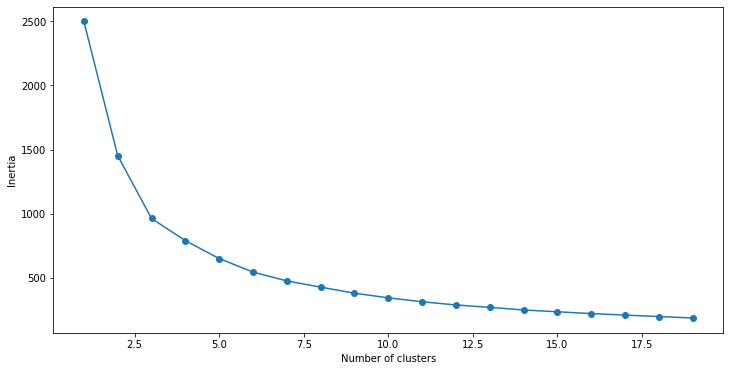

In [163]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

This is used to determine the elbow point in the SSE curve. I used python package kneed to determine the elbow point 

In [98]:
! pip install kneed #need to install the package first 

In [164]:
from kneed import DataGenerator, KneeLocator #import the libaray

In [165]:
 k_1 = KneeLocator(range(1, 20), SSE, curve="convex", direction="decreasing")
 k_1.elbow


5

n_cluster = 5

In [166]:
kmeans = KMeans(n_jobs = -1, n_clusters = 5, init='k-means++')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)
print(kmeans)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)


In [167]:
frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

2    302
0    279
1    243
3    235
4    191
Name: cluster, dtype: int64

In [168]:
frame

,0,1,cluster
0,0.783778,1.182565,0
1,-0.110193,-1.159079,1
2,0.424428,0.081595,2
3,-0.102179,-0.769483,1
4,-1.492371,-0.726839,4
...,...,...,...
1245,0.528027,0.149718,2
1246,-0.394260,-0.973137,1
1247,-0.303324,-0.340086,1
1248,-0.746488,-0.774706,1


In [169]:
centers = np.array(kmeans.cluster_centers_)


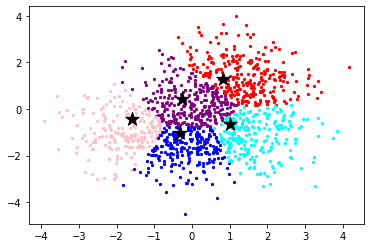

In [170]:
plt.scatter(data[pred==0,0], data[pred==0,1], s=5, c='red')
plt.scatter(data[pred==1,0], data[pred==1,1], s=5, c='blue')
plt.scatter(data[pred==2,0], data[pred==2,1], s=5, c='purple')
plt.scatter(data[pred==3,0], data[pred==3,1], s=5, c='cyan')
plt.scatter(data[pred==4,0], data[pred==4,1], s=5, c='pink')

plt.scatter(centers[:,0], centers[:,1],s=200, c='black', marker='*')




In [171]:
pd.crosstab(pred,kmeans.labels_,  dropna=False)

col_0,0,1,2,3,4
row_0,,,,,
0,279,0,0,0,0
1,0,243,0,0,0
2,0,0,302,0,0
3,0,0,0,235,0
4,0,0,0,0,191


n_clusters = 6

In [172]:
# k means using 6 clusters and k-means++ initialization
kmeans = KMeans(n_jobs = -1, n_clusters = 6, init='k-means++')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)

print(kmeans)
print(pred)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)
[3 5 4 ... 4 5 1]


In [173]:
frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

4    292
5    213
0    213
3    205
2    172
1    155
Name: cluster, dtype: int64

In [174]:
centers = np.array(kmeans.cluster_centers_)


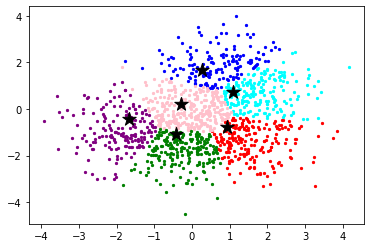

In [175]:
plt.scatter(data[pred==0,0], data[pred==0,1], s=5, c='red')
plt.scatter(data[pred==1,0], data[pred==1,1], s=5, c='blue')
plt.scatter(data[pred==2,0], data[pred==2,1], s=5, c='purple')
plt.scatter(data[pred==3,0], data[pred==3,1], s=5, c='cyan')
plt.scatter(data[pred==4,0], data[pred==4,1], s=5, c='pink')
plt.scatter(data[pred==5,0], data[pred==5,1], s=5, c='green')



plt.scatter(centers[:,0], centers[:,1],s=200, c='black', marker='*')




n_clusters = 7

In [176]:
# k means using 7 clusters and k-means++ initialization
kmeans = KMeans(n_jobs = -1, n_clusters = 7, init='k-means++')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)

print(kmeans)
print(pred)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)
[0 2 6 ... 6 2 4]


In [177]:
frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

6    222
2    213
5    184
3    172
0    172
4    157
1    130
Name: cluster, dtype: int64

In [178]:
centers = np.array(kmeans.cluster_centers_)


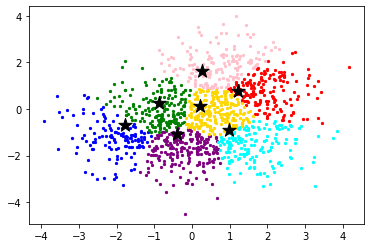

In [179]:
plt.scatter(data[pred==0,0], data[pred==0,1], s=5, c='red')
plt.scatter(data[pred==1,0], data[pred==1,1], s=5, c='blue')
plt.scatter(data[pred==2,0], data[pred==2,1], s=5, c='purple')
plt.scatter(data[pred==3,0], data[pred==3,1], s=5, c='cyan')
plt.scatter(data[pred==4,0], data[pred==4,1], s=5, c='pink')
plt.scatter(data[pred==5,0], data[pred==5,1], s=5, c='green')
plt.scatter(data[pred==6,0], data[pred==6,1], s=5, c='gold')




plt.scatter(centers[:,0], centers[:,1],s=200, c='black', marker='*')


n_cluster = 8

In [180]:
# k means using 8 clusters and k-means++ initialization
kmeans = KMeans(n_jobs = -1, n_clusters = 8, init='k-means++')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)

print(kmeans)
print(pred)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)
[3 6 0 ... 7 7 4]


In [181]:
frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

0    207
7    200
2    192
6    146
3    138
4    133
1    122
5    112
Name: cluster, dtype: int64

In [182]:
centers = np.array(kmeans.cluster_centers_)


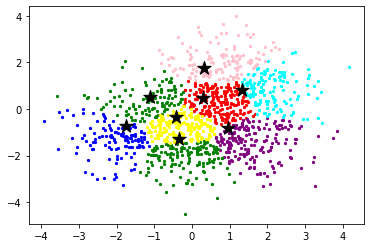

In [183]:
plt.scatter(data[pred==0,0], data[pred==0,1], s=5, c='red')
plt.scatter(data[pred==1,0], data[pred==1,1], s=5, c='blue')
plt.scatter(data[pred==2,0], data[pred==2,1], s=5, c='purple')
plt.scatter(data[pred==3,0], data[pred==3,1], s=5, c='cyan')
plt.scatter(data[pred==4,0], data[pred==4,1], s=5, c='pink')
plt.scatter(data[pred==5,0], data[pred==5,1], s=5, c='green')
plt.scatter(data[pred==6,0], data[pred==6,1], s=5, c='green')
plt.scatter(data[pred==7,0], data[pred==7,1], s=5, c='yellow')





plt.scatter(centers[:,0], centers[:,1],s=200, c='black', marker='*')

n_cluster = 9

In [184]:
# k means using 9clusters and k-means++ initialization
kmeans = KMeans(n_jobs = -1, n_clusters = 9, init='k-means++')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)

print(kmeans)
print(pred)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=9, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)
[0 1 8 ... 2 2 6]


In [185]:
frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

2    206
8    203
3    162
1    126
7    124
0    114
4    112
6    102
5    101
Name: cluster, dtype: int64

In [186]:
centers = np.array(kmeans.cluster_centers_)


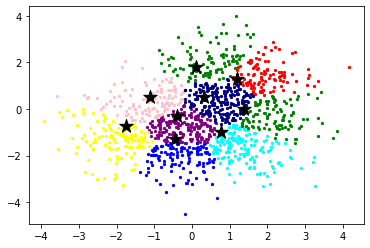

In [187]:
plt.scatter(data[pred==0,0], data[pred==0,1], s=5, c='red')
plt.scatter(data[pred==1,0], data[pred==1,1], s=5, c='blue')
plt.scatter(data[pred==2,0], data[pred==2,1], s=5, c='purple')
plt.scatter(data[pred==3,0], data[pred==3,1], s=5, c='cyan')
plt.scatter(data[pred==4,0], data[pred==4,1], s=5, c='pink')
plt.scatter(data[pred==5,0], data[pred==5,1], s=5, c='green')
plt.scatter(data[pred==6,0], data[pred==6,1], s=5, c='green')
plt.scatter(data[pred==7,0], data[pred==7,1], s=5, c='yellow')
plt.scatter(data[pred==8,0], data[pred==8,1], s=5, c='navy')






plt.scatter(centers[:,0], centers[:,1],s=200, c='black', marker='*')

n_cluster = 10

In [123]:
# k means using 10 clusters and k-means++ initialization
kmeans = KMeans(n_jobs = -1, n_clusters = 10, init='k-means++')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)

print(kmeans)
print(pred)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)
[9 0 2 ... 3 0 1]


In [124]:
frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

2    188
3    164
9    163
0    162
1    129
4    122
6    107
5     87
7     73
8     55
Name: cluster, dtype: int64

In [125]:
centers = np.array(kmeans.cluster_centers_)


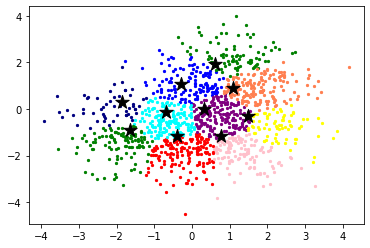

In [126]:
plt.scatter(data[pred==0,0], data[pred==0,1], s=5, c='red')
plt.scatter(data[pred==1,0], data[pred==1,1], s=5, c='blue')
plt.scatter(data[pred==2,0], data[pred==2,1], s=5, c='purple')
plt.scatter(data[pred==3,0], data[pred==3,1], s=5, c='cyan')
plt.scatter(data[pred==4,0], data[pred==4,1], s=5, c='pink')
plt.scatter(data[pred==5,0], data[pred==5,1], s=5, c='green')
plt.scatter(data[pred==6,0], data[pred==6,1], s=5, c='green')
plt.scatter(data[pred==7,0], data[pred==7,1], s=5, c='yellow')
plt.scatter(data[pred==8,0], data[pred==8,1], s=5, c='navy')
plt.scatter(data[pred==9,0], data[pred==9,1], s=5, c='coral')


plt.scatter(centers[:,0], centers[:,1],s=200, c='black', marker='*')